# <font color=Red>__Gagandeep Singh Bajwa__</font>
## <font color=Red>_Student ID: 220293730_</font>

# INTRODUCTION

Linear B-cell epitopes are short protein fragments that are recognized by certain components of the immune system, and their identification is important for developing vaccines, diagnostic tests, and therapeutic interventions against infectious diseases, allergies, and cancers. Computational methods have been used to help prioritize candidates for characterization in the lab, and this coursework explores epitope data to predict epitopes for Alphavirus, a genus of mosquito-borne viruses. The goal is to develop an efficient data mining pipeline to predict new, previously unknown epitopes in viruses from this genus.


# DATA

The coursework uses two training datasets and one validation dataset. The training datasets have 13 information columns, 1280 feature columns, and one class column. The feature columns were extracted using a state-of-the-art feature embedder for protein data, ESM-1b. The validation dataset has the same structure as the training dataset, except for the absence of the class attribute.

# Task 1


### To initiate the work, we have to load various libraries to Jupyter

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("C:\\Users\\gagan\\Downloads\\df_training_level2(1).csv") # Load data into Jupyter

C:\Users\gagan\AppData\Local\Temp\ipykernel_13016\1297695105.py:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("C:\\Users\\gagan\\Downloads\\df_training_level2(1).csv") # Load data into Jupyter


# a. Exploratory Data Analysis

The data is explored using visualization to understand the feature types, possible missing values or outliers, variable scales, and class balance. Due to the high-dimensional nature of the data, intelligent ways are sought to explore high-dimensional data.

In [7]:
df.head() # to check the general shape of the dataframe

,Info_PepID,Info_organism_id,Info_protein_id,Info_pos,Info_AA,Info_pubmed_id,Info_epitope_id,Info_host_id,Info_nPos,Info_nNeg,...,feat_esm1b_1270,feat_esm1b_1271,feat_esm1b_1272,feat_esm1b_1273,feat_esm1b_1274,feat_esm1b_1275,feat_esm1b_1276,feat_esm1b_1277,feat_esm1b_1278,feat_esm1b_1279
0,BAA01867.1:2,1678143,BAA01867.1,262,E,10449466,14543,9606,1,1,...,-0.070886,-0.017200,-0.117530,-0.007250,-1.071874,-0.519040,-0.308719,-0.281276,-0.256712,0.405690
1,BAA01867.1:2,1678143,BAA01867.1,263,T,10449466,14543,9606,1,1,...,0.220630,-0.210780,-0.021335,0.323588,-0.736865,-0.343829,-0.507386,-0.020137,-0.166644,0.751316
2,BAA01867.1:2,1678143,BAA01867.1,264,S,10449466,14543,9606,1,1,...,0.107350,-0.059491,-0.167905,0.257423,-0.930690,-0.271957,-0.133815,0.044392,-0.299376,0.461547
3,BAA01867.1:2,1678143,BAA01867.1,265,G,10449466,14543,9606,1,1,...,0.253621,-0.267090,-0.109026,0.091992,-0.813677,-0.187964,-0.142268,0.091157,-0.436975,0.369129
4,BAA01867.1:2,1678143,BAA01867.1,266,V,10449466,14543,9606,1,1,...,0.027382,0.018629,-0.157104,0.305302,-1.121274,-0.048636,-0.246171,0.147852,-0.299121,0.225209


### Now, its time to check statistical features of the data. Certain outlier could also be checked from this view.

In [8]:
df.describe(include='all')

,Info_PepID,Info_organism_id,Info_protein_id,Info_pos,Info_AA,Info_pubmed_id,Info_epitope_id,Info_host_id,Info_nPos,Info_nNeg,...,feat_esm1b_1270,feat_esm1b_1271,feat_esm1b_1272,feat_esm1b_1273,feat_esm1b_1274,feat_esm1b_1275,feat_esm1b_1276,feat_esm1b_1277,feat_esm1b_1278,feat_esm1b_1279
count,4946,4.946000e+03,4946,4946.000000,4946,4946.0,4946,4946.0,4946,4946,...,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000
unique,142,NaN,46,NaN,20,65.0,1912,29.0,463,417,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,AAA03189.1:3,NaN,AAA03189.1,NaN,A,1373890.0,45612,9606.0,"0,0","1,1",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,290,NaN,1623,NaN,490,2015.0,35,2048.0,1064,1105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.023239e+06,NaN,459.829559,NaN,NaN,NaN,NaN,NaN,NaN,...,0.165610,-0.068945,-0.038972,0.059846,-0.868964,-0.141099,0.039288,0.009943,0.012112,0.253001
std,NaN,8.105177e+05,NaN,437.986790,NaN,NaN,NaN,NaN,NaN,NaN,...,0.197846,0.161084,0.167719,0.167216,0.460807,0.163033,0.192016,0.159694,0.203489,0.213243
min,NaN,1.104100e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.557992,-0.744021,-0.792559,-0.810112,-1.842048,-0.720878,-0.728314,-0.713135,-1.084759,-0.984750
25%,NaN,1.230500e+04,NaN,113.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.039808,-0.174682,-0.144109,-0.039304,-1.179944,-0.249053,-0.091472,-0.075154,-0.115939,0.153016
50%,NaN,1.678143e+06,NaN,326.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.146975,-0.065006,-0.034378,0.066762,-0.937241,-0.153513,0.033876,0.022752,0.032889,0.272629
75%,NaN,1.678143e+06,NaN,616.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.261899,0.032938,0.074039,0.165388,-0.652044,-0.049282,0.164783,0.110488,0.154810,0.387973


### This command reflects data dtype and non null entries.It is a quick way to check NAN entries.

In [9]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4946 entries, 0 to 4945
Data columns (total 1294 columns):
 #     Column            Non-Null Count  Dtype  
---    ------            --------------  -----  
 0     Info_PepID        4946 non-null   object 
 1     Info_organism_id  4946 non-null   int64  
 2     Info_protein_id   4946 non-null   object 
 3     Info_pos          4946 non-null   int64  
 4     Info_AA           4946 non-null   object 
 5     Info_pubmed_id    4946 non-null   object 
 6     Info_epitope_id   4946 non-null   object 
 7     Info_host_id      4946 non-null   object 
 8     Info_nPos         4946 non-null   object 
 9     Info_nNeg         4946 non-null   object 
 10    Info_type         4946 non-null   object 
 11    Info_window       4946 non-null   object 
 12    Info_cluster      4946 non-null   int64  
 13    Class             4946 non-null   int64  
 14    feat_esm1b_0      4425 non-null   float64
 15    feat_esm1b_1      4425 non-null   float64
 16    fe

## There are three types of Data Types as shown above and also columns with different data types are shown below

In [10]:
df.select_dtypes(include=int) # columns with int Data Type 

,Info_organism_id,Info_pos,Info_cluster,Class
0,1678143,262,34,-1
1,1678143,263,34,-1
2,1678143,264,34,-1
3,1678143,265,34,-1
4,1678143,266,34,-1
...,...,...,...,...
4941,1678143,412,34,1
4942,1678143,413,34,1
4943,1678143,414,34,1
4944,1678143,415,34,1


In [11]:
df.select_dtypes(include=float) # Columns with float data type

,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,feat_esm1b_6,feat_esm1b_7,feat_esm1b_8,feat_esm1b_9,...,feat_esm1b_1270,feat_esm1b_1271,feat_esm1b_1272,feat_esm1b_1273,feat_esm1b_1274,feat_esm1b_1275,feat_esm1b_1276,feat_esm1b_1277,feat_esm1b_1278,feat_esm1b_1279
0,-0.021067,-0.165189,0.173732,0.104066,-0.100211,-0.042768,-0.430647,-0.212912,-0.632184,0.078822,...,-0.070886,-0.017200,-0.117530,-0.007250,-1.071874,-0.519040,-0.308719,-0.281276,-0.256712,0.405690
1,0.026400,0.028715,0.093638,-0.046767,0.072711,-0.321925,-0.314515,0.071320,-0.413840,0.322447,...,0.220630,-0.210780,-0.021335,0.323588,-0.736865,-0.343829,-0.507386,-0.020137,-0.166644,0.751316
2,-0.140944,0.106401,0.205669,0.160118,-0.104789,-0.309539,-0.205587,0.058554,-0.466790,0.148556,...,0.107350,-0.059491,-0.167905,0.257423,-0.930690,-0.271957,-0.133815,0.044392,-0.299376,0.461547
3,0.120088,0.108923,-0.086904,0.196164,-0.251497,-0.205923,-0.483595,0.061114,-0.623314,0.309336,...,0.253621,-0.267090,-0.109026,0.091992,-0.813677,-0.187964,-0.142268,0.091157,-0.436975,0.369129
4,0.083401,0.060489,0.070889,-0.058935,-0.192792,-0.258103,-0.379416,0.123201,-0.570444,0.221958,...,0.027382,0.018629,-0.157104,0.305302,-1.121274,-0.048636,-0.246171,0.147852,-0.299121,0.225209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.select_dtypes(include=object) # Columns with Object Data type.'Object' Data types signifies that it has mixed data type

,Info_PepID,Info_protein_id,Info_AA,Info_pubmed_id,Info_epitope_id,Info_host_id,Info_nPos,Info_nNeg,Info_type,Info_window
0,BAA01867.1:2,BAA01867.1,E,10449466,14543,9606,1,1,Epitope containing region/antigenic site,NQGWRSVETSGVAEE
1,BAA01867.1:2,BAA01867.1,T,10449466,14543,9606,1,1,Epitope containing region/antigenic site,QGWRSVETSGVAEEE
2,BAA01867.1:2,BAA01867.1,S,10449466,14543,9606,1,1,Epitope containing region/antigenic site,GWRSVETSGVAEEEA
3,BAA01867.1:2,BAA01867.1,G,10449466,14543,9606,1,1,Epitope containing region/antigenic site,WRSVETSGVAEEEAT
4,BAA01867.1:2,BAA01867.1,V,10449466,14543,9606,1,1,Epitope containing region/antigenic site,RSVETSGVAEEEATS
...,...,...,...,...,...,...,...,...,...,...
4941,ACR56298.1:2,ACR56298.1,L,34129082,1597199,10000000,11,0,Exact Epitope,NGEPTVKLYTSVENA
4942,ACR56298.1:2,ACR56298.1,Y,34129082,1597199,10000000,11,0,Exact Epitope,GEPTVKLYTSVENAQ
4943,ACR56298.1:2,ACR56298.1,T,34129082,1597199,10000000,11,0,Exact Epitope,EPTVKLYTSVENAQQ
4944,ACR56298.1:2,ACR56298.1,S,34129082,1597199,10000000,11,0,Exact Epitope,PTVKLYTSVENAQQD


### Now, its time to check for the total of missing values in every column.

In [13]:
missing_values_columns=df.isnull().sum()

In [14]:
missing_values_columns

Info_PepID            0
Info_organism_id      0
Info_protein_id       0
Info_pos              0
Info_AA               0
                   ... 
feat_esm1b_1275     521
feat_esm1b_1276     521
feat_esm1b_1277     521
feat_esm1b_1278     521
feat_esm1b_1279     521
Length: 1294, dtype: int64

### The percentage of missing values with respect to the length of the column need to calculated to have a idea about the ratio of missing values.

In [15]:
percent_missing_columns=100*missing_values_columns  / len(df)

In [16]:
sorted_missing_columns = percent_missing_columns.sort_values(ascending=False)

In [17]:
sorted_missing_columns

feat_esm1b_633    10.533765
feat_esm1b_876    10.533765
feat_esm1b_854    10.533765
feat_esm1b_853    10.533765
feat_esm1b_852    10.533765
                    ...    
Info_type          0.000000
Info_window        0.000000
Info_cluster       0.000000
Class              0.000000
Info_PepID         0.000000
Length: 1294, dtype: float64

In [18]:
df.isnull().sum(axis=1).value_counts()

0       4425
1280     521
dtype: int64

### We can make a dataframe for all the rows with NaN values.

In [19]:
null_data_rows = df[df.isnull().any(axis=1)]

In [20]:
null_data_rows

,Info_PepID,Info_organism_id,Info_protein_id,Info_pos,Info_AA,Info_pubmed_id,Info_epitope_id,Info_host_id,Info_nPos,Info_nNeg,...,feat_esm1b_1270,feat_esm1b_1271,feat_esm1b_1272,feat_esm1b_1273,feat_esm1b_1274,feat_esm1b_1275,feat_esm1b_1276,feat_esm1b_1277,feat_esm1b_1278,feat_esm1b_1279
2314,AAA03191.1:7,1678143,AAA03191.1,659,E,"1373890,10686019","34022,65190","9606,10116","0,2","1,1",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2315,AAA03191.1:7,1678143,AAA03191.1,660,L,"1373890,10686019","34022,65190","9606,10116","0,2","1,1",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2439,AAG16766.1:2,1678143,AAG16766.1,221,S,11601892,62084,10090,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2440,AAG16766.1:2,1678143,AAG16766.1,222,V,11601892,62084,10090,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2441,AAG16766.1:2,1678143,AAG16766.1,223,D,11601892,62084,10090,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4941,ACR56298.1:2,1678143,ACR56298.1,412,L,34129082,1597199,10000000,11,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4942,ACR56298.1:2,1678143,ACR56298.1,413,Y,34129082,1597199,10000000,11,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4943,ACR56298.1:2,1678143,ACR56298.1,414,T,34129082,1597199,10000000,11,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4944,ACR56298.1:2,1678143,ACR56298.1,415,S,34129082,1597199,10000000,11,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
null_data_rows['Info_cluster'].value_counts() # only cluster 34 and 39 have missing values.

34    488
39     33
Name: Info_cluster, dtype: int64

In [22]:
100*len(null_data_rows)/len(df)

10.533764658309746

 Rows which has all the values missing is 10% of the total number of rows, therefore, it is safe to drop these rows entirely.
 After keen observation, it is known that 521 rows have all missing data in them but not in 13 Info and 1 Class column. So practically these rows have no use but, we cannot use 'all' in 'dropna' command but instead we have to use 'any' . There would no collataral damage as we have already checked that only these rows have missing data.

In [23]:
df=df.dropna(how='any')

# New Dataframe after removal of rows with missing values

### It's time to calculate the number of values in each cluster.

In [24]:
df['Info_cluster'].value_counts()

35     1623
34     1145
150     564
204     516
36      244
298      69
229      54
232      45
198      43
320      42
199      30
215      20
222      15
264       8
256       7
Name: Info_cluster, dtype: int64

In [25]:
df_new = df.iloc[:, 12:] # separating Info Columns from feat columns but to retain "Class" and "Info_cluster" column 

In [26]:
df_new.head()

,Info_cluster,Class,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,feat_esm1b_6,feat_esm1b_7,...,feat_esm1b_1270,feat_esm1b_1271,feat_esm1b_1272,feat_esm1b_1273,feat_esm1b_1274,feat_esm1b_1275,feat_esm1b_1276,feat_esm1b_1277,feat_esm1b_1278,feat_esm1b_1279
0,34,-1,-0.021067,-0.165189,0.173732,0.104066,-0.100211,-0.042768,-0.430647,-0.212912,...,-0.070886,-0.017200,-0.117530,-0.007250,-1.071874,-0.519040,-0.308719,-0.281276,-0.256712,0.405690
1,34,-1,0.026400,0.028715,0.093638,-0.046767,0.072711,-0.321925,-0.314515,0.071320,...,0.220630,-0.210780,-0.021335,0.323588,-0.736865,-0.343829,-0.507386,-0.020137,-0.166644,0.751316
2,34,-1,-0.140944,0.106401,0.205669,0.160118,-0.104789,-0.309539,-0.205587,0.058554,...,0.107350,-0.059491,-0.167905,0.257423,-0.930690,-0.271957,-0.133815,0.044392,-0.299376,0.461547
3,34,-1,0.120088,0.108923,-0.086904,0.196164,-0.251497,-0.205923,-0.483595,0.061114,...,0.253621,-0.267090,-0.109026,0.091992,-0.813677,-0.187964,-0.142268,0.091157,-0.436975,0.369129
4,34,-1,0.083401,0.060489,0.070889,-0.058935,-0.192792,-0.258103,-0.379416,0.123201,...,0.027382,0.018629,-0.157104,0.305302,-1.121274,-0.048636,-0.246171,0.147852,-0.299121,0.225209


### We have to divide the given data into Train(60%):Test(30%):validate(10%).In order to do that in such a way that every cluster remains in same set.Therfore, we have to check value of each class in every cluster.

In [27]:
df_new.groupby(['Info_cluster','Class'])['Info_cluster'].count()

Info_cluster  Class
34            -1       1083
               1         62
35            -1       1513
               1        110
36            -1        183
               1         61
150           -1        283
               1        281
198           -1         12
               1         31
199            1         30
204           -1        289
               1        227
215            1         20
222            1         15
229            1         54
232            1         45
256            1          7
264            1          8
298            1         69
320            1         42
Name: Info_cluster, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

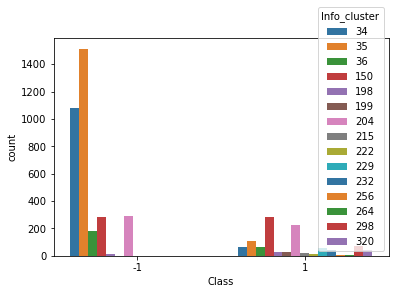

In [28]:

sns.countplot(data=df_new,x='Class',hue='Info_cluster',palette='tab10')

The above bar chart shows how imbalance are the different clusters

### Divide data manually

In [29]:
train_clusters = [35, 150,204]
test_clusters = [199,34,298, 215,222,229,232,256]
val_clusters = [36,264,198,320]

In [30]:
df_train = df_new[df_new['Info_cluster'].isin(train_clusters)]
df_test = df_new[df_new['Info_cluster'].isin(test_clusters)]
df_val = df_new[df_new['Info_cluster'].isin(val_clusters)]


In [31]:
y=df_train['Class']

In [32]:
df_features=df_train.iloc[:,2:]

In [33]:
df_features.head()

,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,feat_esm1b_6,feat_esm1b_7,feat_esm1b_8,feat_esm1b_9,...,feat_esm1b_1270,feat_esm1b_1271,feat_esm1b_1272,feat_esm1b_1273,feat_esm1b_1274,feat_esm1b_1275,feat_esm1b_1276,feat_esm1b_1277,feat_esm1b_1278,feat_esm1b_1279
33,0.053442,-0.118947,0.305982,0.115797,-0.070483,-0.053626,-0.100090,-0.027533,-0.161895,-0.031956,...,-0.146789,0.108406,0.126869,0.185259,-0.460547,-0.170926,-0.120551,0.122495,-0.129387,0.049911
34,0.303059,-0.121561,0.032785,0.053781,-0.342253,-0.098895,-0.252247,-0.071756,-0.168585,0.052700,...,0.039418,-0.136333,-0.066101,0.359679,-1.489768,-0.080543,0.103032,-0.019953,0.082606,0.283611
35,-0.009707,0.104942,-0.133511,0.072751,-0.156131,-0.099091,-0.142077,-0.155829,-0.336115,0.079102,...,0.107810,-0.122576,-0.171229,0.381013,-1.297186,-0.024779,0.167487,0.366667,0.102095,0.212318
36,0.178657,0.123151,0.060571,-0.095855,-0.295164,-0.151600,-0.110435,0.020327,-0.161581,-0.014856,...,0.138005,0.078371,0.012332,-0.047585,-1.185170,-0.203777,-0.079107,0.145049,0.136585,0.315026
37,0.104734,0.163018,-0.078343,0.143531,-0.094094,-0.128864,-0.302301,0.135215,-0.223730,-0.065067,...,0.264376,-0.014597,0.074889,0.265639,-1.407780,-0.050073,0.009404,0.114800,0.152620,0.305590


### To remove outliers, we will check skewness of every column and then remove outliers from those columns . We will replace those outliers with flooring and capping values as shown below.

In [34]:
skewness = df_features.skew()



# Find columns with skewness greater than 1.5
skewed_columns_greater = skewness[skewness > 1.5].index

# Find columns with skewness less than 1.5
skewed_columns_less = skewness[skewness < -1.5].index

# Combine columns with skewness greater than 1.5 and less than 1.5
combined_columns = skewed_columns_greater.union(skewed_columns_less)

# Create a new DataFrame with the combined columns
combined_df = df_features[combined_columns]

print("Combined DataFrame:\n", combined_df)


Combined DataFrame:
       feat_esm1b_1013  feat_esm1b_450
33           0.106522       -2.055178
34           0.100852       -1.788448
35           0.131121       -1.840190
36           0.123732       -1.912887
37           0.150382       -1.863655
...               ...             ...
4936         0.052071       -1.731239
4937        -0.068052       -1.805906
4938        -0.032444       -1.720458
4939         0.018356       -1.616361
4940        -0.041372       -1.628092

[2703 rows x 2 columns]


### We can also check distribution of these columns visulally as shown below.

<AxesSubplot:xlabel='feat_esm1b_1013', ylabel='Count'>

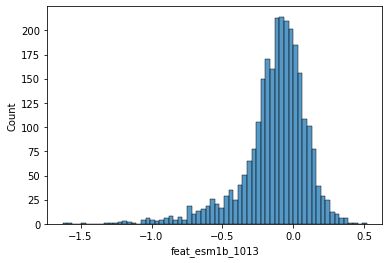

In [35]:
sns.histplot(data=combined_df,x='feat_esm1b_1013')

<AxesSubplot:xlabel='feat_esm1b_450', ylabel='Count'>

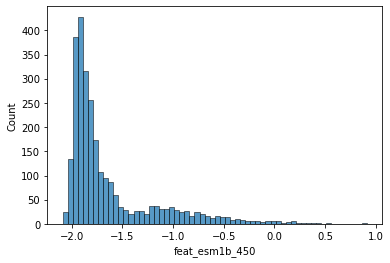

In [36]:
sns.histplot(data=combined_df,x='feat_esm1b_450')

Quantile-based Flooring and Capping

In [37]:
print(df_features['feat_esm1b_450'].quantile(0.10))
print(df_features['feat_esm1b_450'].quantile(0.90))

-1.971736156940458
-0.9276997526486713


Now removing the Outliers

In [38]:
df_features["feat_esm1b_450"] = np.where(df_features["feat_esm1b_450"] <df_features['feat_esm1b_450'].quantile(0.10), df_features['feat_esm1b_450'].quantile(0.10),df_features['feat_esm1b_450'])
df_features["feat_esm1b_450"] = np.where(df_features["feat_esm1b_450"] >df_features['feat_esm1b_450'].quantile(0.90), df_features['feat_esm1b_450'].quantile(0.90),df_features['feat_esm1b_450'])
print(df_features['feat_esm1b_450'].skew())

1.226709290522787


Now its Skewness has improved,Smiliarly, we will proceed for second column

In [39]:
df_features["feat_esm1b_1013"] = np.where(df_features["feat_esm1b_1013"] <df_features['feat_esm1b_1013'].quantile(0.10), df_features['feat_esm1b_1013'].quantile(0.10),df_features['feat_esm1b_1013'])
df_features["feat_esm1b_1013"] = np.where(df_features["feat_esm1b_1013"] >df_features['feat_esm1b_1013'].quantile(0.90), df_features['feat_esm1b_1013'].quantile(0.90),df_features['feat_esm1b_1013'])
print(df_features['feat_esm1b_1013'].skew())

-0.42665223667311303


<AxesSubplot:xlabel='feat_esm1b_450', ylabel='Count'>

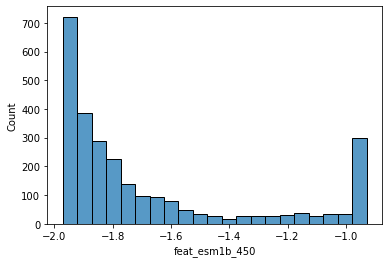

In [40]:
sns.histplot(data=df_features,x='feat_esm1b_450') # Distributio after outliers removal 

<AxesSubplot:xlabel='feat_esm1b_1013', ylabel='Count'>

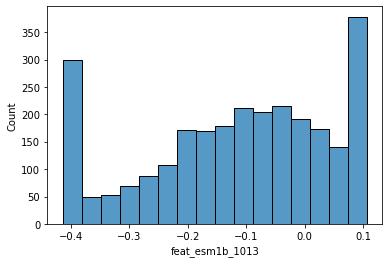

In [41]:
sns.histplot(data=df_features,x='feat_esm1b_1013')

# b. Data pre-processing:

### As the data could be of different dimensions, for example, one column could be in metres and other could be in cms. Therfore, in order to make them comparable, we have scale the data. Here, we will use MinMaxScaler. 

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler=MinMaxScaler()

In [44]:
scaler.fit(df_features)

MinMaxScaler()

In [45]:
df_features_scaled=scaler.transform(df_features)

# c. Feature reduction

### As we have already seen, there are more than 1200 features in this dataset, therefore, we have to reduce the number of features in such a way that maximum data can explained with minimum number of columns.Now, we will try different dimensionality reduction methods.
1. Information Gain(IG)
2. chi square test
3. Principal Component Analysis(PCA)

In [46]:
from sklearn.feature_selection import mutual_info_classif

In [47]:
importances=mutual_info_classif(df_features_scaled,y)
feat_importances=pd.Series(importances,df_features.columns[0:len(df_features.columns)])


<AxesSubplot:>

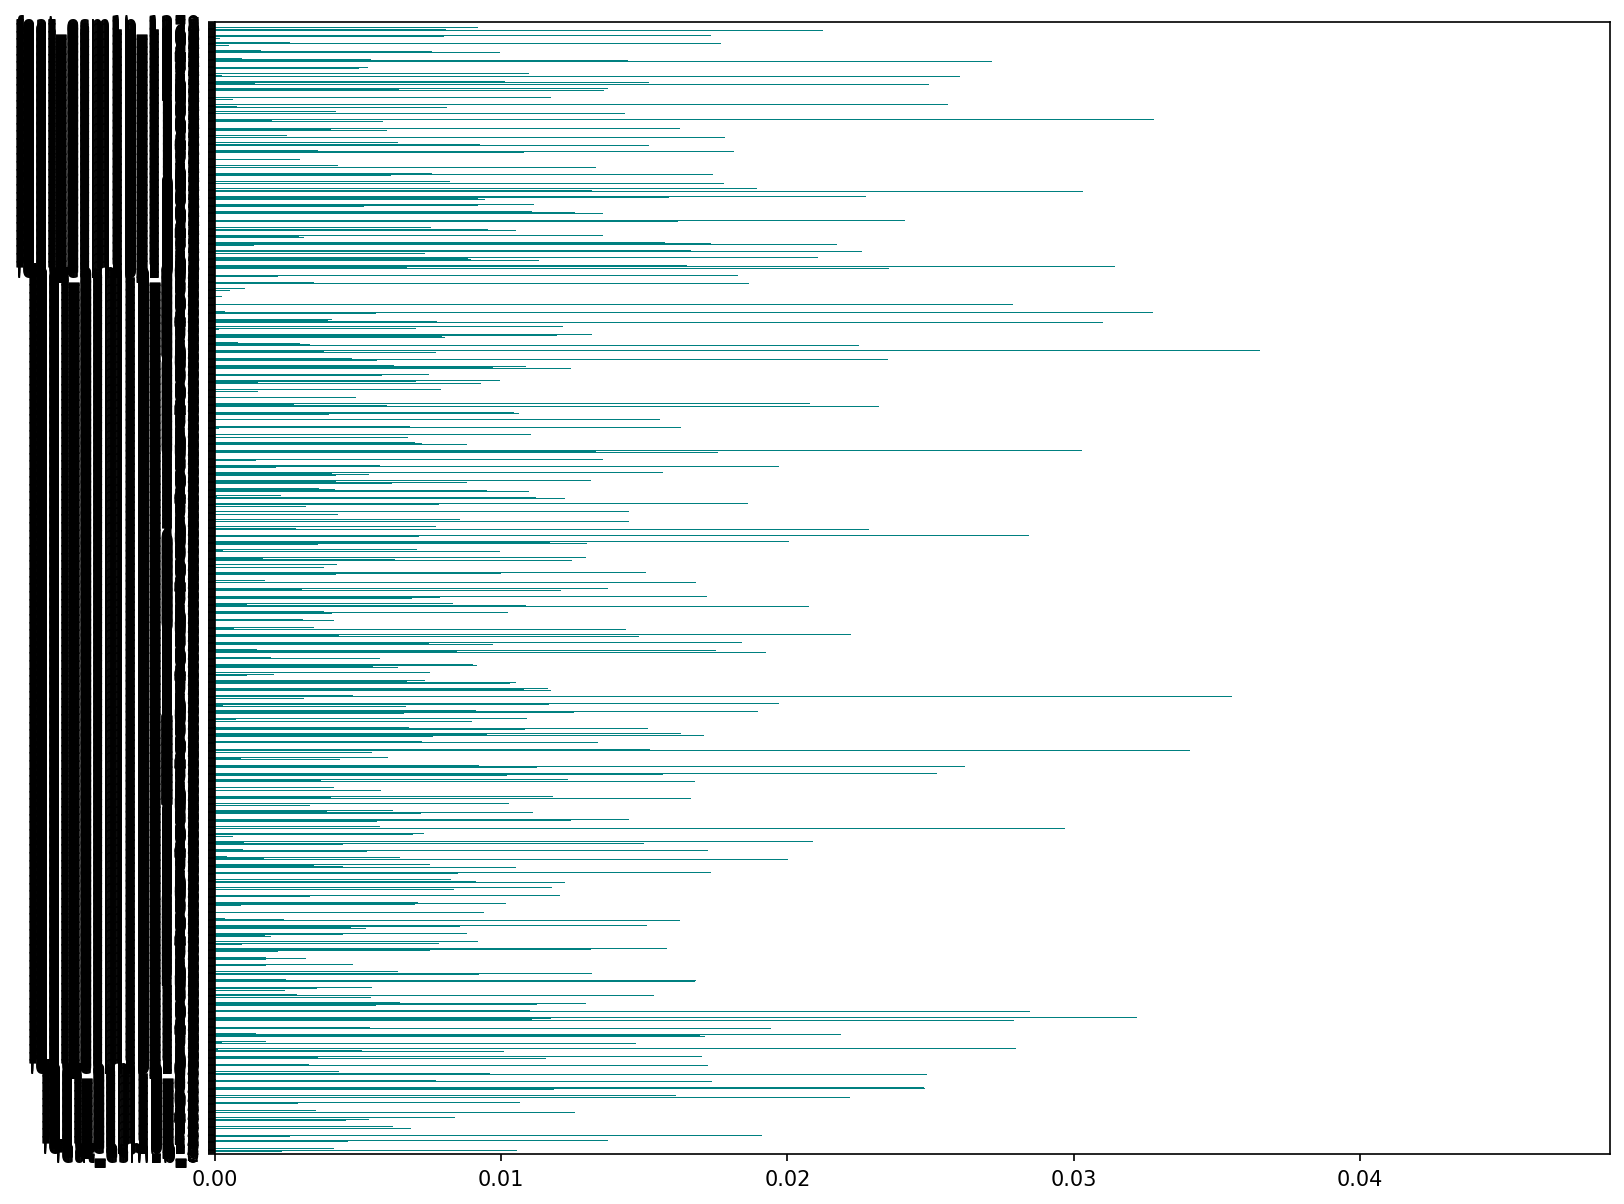

In [48]:
plt.figure(figsize=(12,10),dpi=150)
feat_importances.plot(kind='barh',color='teal')


### As we can see, it is manually impossible to to select the correct number of features with this method.We will now try chi square method.

In [49]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [50]:
chi2_features= SelectKBest(chi2,k=5)
X_kbest_features=chi2_features.fit_transform(df_features_scaled,y)
print(df_features_scaled.shape[1])
print(X_kbest_features.shape[1])

1280
5


### chi square method is very powerfull method for dimension reduction but we have to decide number of features, we want to retain, which in my opinion is not useful.Therefore, we will now move to PCA. 

# PCA

In [51]:
from sklearn.decomposition import PCA

### To know correct number of components, we can draw a elbow graph in such a way that we can decide that what number of components are necessary for our threshold explained variance.

In [52]:
explained_variance = []

for n in range(1,200):
    pca = PCA(n_components=n)
    P_components=pca.fit_transform(df_features_scaled)
    
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

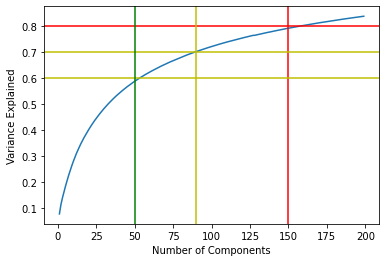

In [53]:
plt.plot(range(1,200),explained_variance)
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained")
plt.axhline(y=0.80, color='r')
plt.axvline(x=150, color='r')

plt.axhline(y=0.70, color='y')
plt.axvline(x=90, color='y')

plt.axhline(y=0.6, color='y')
plt.axvline(x=50, color='g')


### With the help of above graph, it is known that 90 components are necessary for 70% of explained variance.

In [54]:
pca = PCA(n_components=90)
P_components=pca.fit_transform(df_features_scaled)

In [55]:
df_pca = pd.DataFrame(data=P_components, index=df_features.index) # to covert components into dataframe with same index numbers as before

In [56]:
df_pca

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
33,-0.373826,-0.156804,-0.154334,-0.002961,0.059558,-0.159870,-0.086134,-0.099911,-0.243480,-0.118084,...,0.452559,-0.442529,0.283978,0.398087,-0.019980,0.177308,-0.500714,-0.173377,-0.123583,-0.091328
34,-0.616591,0.115823,-0.146949,-0.158046,-0.016046,-0.015366,0.059182,-0.028945,-0.220422,-0.050444,...,0.233511,-0.291103,0.302286,0.118018,-0.365165,-0.134196,-0.224526,-0.282079,-0.385670,0.110806
35,-0.927590,0.008641,0.105219,0.350409,-0.200986,-1.028925,1.307984,-0.252247,-0.282105,-0.020289,...,-0.015239,-0.010310,0.116920,0.036048,-0.190396,-0.084474,0.109055,-0.221340,-0.197276,0.227659
36,-1.049677,-0.091417,-0.043780,0.087404,0.023073,-0.030685,-0.228527,0.067405,0.005663,-0.113527,...,-0.037410,0.013784,0.053951,-0.032276,-0.094109,-0.147411,-0.007308,-0.214086,-0.108514,0.180106
37,-0.977777,0.021061,-0.103046,0.209928,0.052654,-0.187792,0.105129,0.034192,-0.152744,0.072549,...,-0.323535,0.036955,-0.073120,0.107812,-0.156393,-0.244802,-0.081243,-0.077557,-0.111367,0.042305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4936,-0.276284,1.759127,-0.129514,-0.430142,0.351240,0.587784,-0.095718,-0.293351,-0.424009,-0.326820,...,0.185556,0.295836,-0.240524,-0.155944,0.024517,0.203248,-0.020080,0.388920,0.126170,0.553824
4937,-0.205892,1.197797,-0.312355,-0.493415,0.562083,1.291078,0.638035,-1.060891,0.078599,-0.467005,...,0.088479,0.228516,-0.161907,0.078754,-0.297780,0.371021,0.034398,0.340767,0.144802,0.392438
4938,-0.230117,1.566890,-0.062149,-0.465496,0.324741,0.168842,0.337337,-0.466345,-0.337360,-0.050888,...,0.148387,0.292858,-0.255700,-0.086924,-0.209441,0.200268,-0.112247,0.285467,0.157892,0.233876
4939,0.166509,1.505241,-0.127608,-0.254465,-0.113317,-0.613234,1.306437,-0.346673,0.052739,-0.050221,...,0.183819,0.177902,-0.152126,0.155046,-0.330693,0.453722,-0.276595,0.318670,-0.056860,0.423281


In [57]:
df_train_class=df_train['Class']

In [58]:
df_train_info=df_train['Info_cluster']

### For better model development, I will again split my training and components data.

In [59]:
train_clusters = [150,204]
df_train_split1 = df_train[df_train['Info_cluster'].isin(train_clusters)]
df_pca_split1=df_pca[df_train['Info_cluster'].isin(train_clusters)]

In [60]:
df_pca_split1

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
3429,-1.017395,-0.546019,-0.078825,-0.029333,0.302164,0.041679,0.066557,-0.336418,-0.536760,0.058487,...,0.208239,0.148192,0.053138,0.028915,-0.094227,-0.218099,0.033202,-0.100265,0.213806,-0.157730
3430,-0.846203,-0.744831,-0.298931,-0.113148,0.465249,1.242171,0.420357,-1.013395,-0.002841,-0.496487,...,0.253632,0.163652,0.028436,-0.083566,-0.046590,-0.058398,-0.096802,-0.154625,0.150003,-0.126729
3431,-0.765091,-0.639716,-0.049284,-0.101953,0.272888,0.009228,-0.093170,-0.169318,0.117856,-0.145222,...,0.142954,0.015561,0.334792,-0.035880,0.045876,0.077850,-0.084527,-0.107659,0.054739,0.009602
3432,-0.930566,-0.606807,0.028379,0.551750,-0.052020,-0.891327,1.387360,-0.264269,-0.254689,0.011735,...,-0.003454,0.051710,-0.007752,0.030906,-0.104145,-0.172678,-0.157474,-0.046281,0.085467,-0.373043
3433,-1.007774,0.177937,-0.378621,1.832779,-0.227626,-0.369410,-0.781535,-0.600571,0.048655,0.313175,...,-0.037286,0.066843,0.182451,0.100479,-0.113724,-0.138185,0.099739,-0.236674,0.182243,-0.171331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4936,-0.276284,1.759127,-0.129514,-0.430142,0.351240,0.587784,-0.095718,-0.293351,-0.424009,-0.326820,...,0.185556,0.295836,-0.240524,-0.155944,0.024517,0.203248,-0.020080,0.388920,0.126170,0.553824
4937,-0.205892,1.197797,-0.312355,-0.493415,0.562083,1.291078,0.638035,-1.060891,0.078599,-0.467005,...,0.088479,0.228516,-0.161907,0.078754,-0.297780,0.371021,0.034398,0.340767,0.144802,0.392438
4938,-0.230117,1.566890,-0.062149,-0.465496,0.324741,0.168842,0.337337,-0.466345,-0.337360,-0.050888,...,0.148387,0.292858,-0.255700,-0.086924,-0.209441,0.200268,-0.112247,0.285467,0.157892,0.233876
4939,0.166509,1.505241,-0.127608,-0.254465,-0.113317,-0.613234,1.306437,-0.346673,0.052739,-0.050221,...,0.183819,0.177902,-0.152126,0.155046,-0.330693,0.453722,-0.276595,0.318670,-0.056860,0.423281


In [61]:
df_train_split1

,Info_cluster,Class,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,feat_esm1b_6,feat_esm1b_7,...,feat_esm1b_1270,feat_esm1b_1271,feat_esm1b_1272,feat_esm1b_1273,feat_esm1b_1274,feat_esm1b_1275,feat_esm1b_1276,feat_esm1b_1277,feat_esm1b_1278,feat_esm1b_1279
3429,150,1,0.099816,0.317347,0.230496,0.012525,0.110873,0.002562,-0.077425,0.018806,...,-0.025537,-0.083238,0.012165,0.149844,-0.829057,-0.134383,-0.082184,-0.035591,-0.029210,0.400337
3430,150,1,0.203278,0.193663,0.150712,0.001678,-0.291512,0.035538,-0.368598,-0.392617,...,0.248536,-0.379445,-0.033261,0.056291,-0.596806,-0.228356,0.183571,0.045570,0.206811,0.161657
3431,150,1,-0.065495,0.288112,0.111423,0.049842,-0.214084,0.117622,-0.121742,-0.132868,...,0.113633,-0.180051,0.015753,0.137146,-0.815023,-0.145358,0.153395,0.026982,-0.036898,0.472214
3432,150,1,0.206901,0.250490,0.192996,-0.123496,-0.098696,0.132997,-0.028316,-0.271054,...,0.105232,-0.319095,-0.045829,0.113415,-0.982526,-0.250963,-0.071179,-0.161308,0.007344,0.479956
3433,150,1,0.270380,0.428612,0.280971,-0.177800,-0.171358,-0.079705,-0.046312,-0.118421,...,0.163922,-0.211850,0.325251,0.091875,-0.763167,-0.218848,-0.199391,0.002419,0.282258,0.433124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4936,204,-1,-0.099205,-0.086350,0.195327,0.431867,-0.120620,0.036201,0.039033,-0.132952,...,0.029669,-0.042895,0.091792,0.242956,-0.800064,-0.354840,0.056317,-0.272622,0.106605,0.143599
4937,204,-1,0.240618,-0.103619,0.045502,0.340119,-0.215018,0.151882,-0.288610,-0.040719,...,0.260223,-0.063543,0.112609,0.152967,-0.707485,-0.151659,-0.060702,-0.275538,0.017652,0.114673
4938,204,-1,0.092526,-0.117439,0.053132,0.197930,0.076320,0.075659,0.053108,0.106536,...,-0.103867,0.033188,-0.064303,0.061436,-0.648952,-0.077129,-0.036605,-0.163268,-0.008121,0.210083
4939,204,-1,-0.070685,-0.231473,0.085159,0.376238,-0.126311,0.047652,-0.016102,-0.190941,...,0.013539,-0.029030,-0.113012,0.251461,-0.370008,0.020366,-0.213679,-0.212025,0.089132,0.075420


### Similarly for the test data

In [62]:
test_cluster_split=[35]
df_train_split2 = df_train[df_train['Info_cluster'].isin(test_cluster_split)]
df_pca_split2=df_pca[df_train['Info_cluster'].isin(test_cluster_split)]

In [63]:
df_pca_split2

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
33,-0.373826,-0.156804,-0.154334,-0.002961,0.059558,-0.159870,-0.086134,-0.099911,-0.243480,-0.118084,...,0.452559,-0.442529,0.283978,0.398087,-0.019980,0.177308,-0.500714,-0.173377,-0.123583,-0.091328
34,-0.616591,0.115823,-0.146949,-0.158046,-0.016046,-0.015366,0.059182,-0.028945,-0.220422,-0.050444,...,0.233511,-0.291103,0.302286,0.118018,-0.365165,-0.134196,-0.224526,-0.282079,-0.385670,0.110806
35,-0.927590,0.008641,0.105219,0.350409,-0.200986,-1.028925,1.307984,-0.252247,-0.282105,-0.020289,...,-0.015239,-0.010310,0.116920,0.036048,-0.190396,-0.084474,0.109055,-0.221340,-0.197276,0.227659
36,-1.049677,-0.091417,-0.043780,0.087404,0.023073,-0.030685,-0.228527,0.067405,0.005663,-0.113527,...,-0.037410,0.013784,0.053951,-0.032276,-0.094109,-0.147411,-0.007308,-0.214086,-0.108514,0.180106
37,-0.977777,0.021061,-0.103046,0.209928,0.052654,-0.187792,0.105129,0.034192,-0.152744,0.072549,...,-0.323535,0.036955,-0.073120,0.107812,-0.156393,-0.244802,-0.081243,-0.077557,-0.111367,0.042305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,0.416924,-0.419298,1.571317,-0.851098,-0.620628,-0.925798,-1.132101,-0.308073,-0.381616,-0.565171,...,0.097689,0.347749,-0.148615,-0.027429,-0.091445,-0.101034,0.054035,-0.204536,0.125935,0.019082
1652,0.277528,-0.388903,1.378618,-0.002579,-0.691683,0.318269,-0.243750,0.034945,-0.227086,-0.478703,...,-0.059234,0.368028,-0.053952,0.027830,-0.186590,-0.136962,0.098116,-0.182825,-0.114593,0.054767
1653,0.280214,-0.328867,1.068722,0.281104,-1.011901,0.701090,-0.080292,1.578757,-0.510520,-0.042340,...,0.013070,0.325640,-0.075548,-0.005162,-0.105462,-0.125522,-0.017152,-0.072824,-0.001676,0.128253
1654,0.198888,-0.460550,1.365792,0.069967,-0.950196,0.434089,0.053813,0.060167,1.548545,-0.024969,...,0.125459,0.206111,0.063982,0.090014,-0.183392,-0.156338,0.039273,-0.275195,0.076807,0.176861


### Dividing class label for respective splits

In [64]:
y_split1=df_train_split1['Class']
y_split2=df_train_split2['Class']

# Modelling

### Finally, we will proceed towards modelling.I am going to try RandomForest classifier first.

No need of scaling the data.For classification tasks, the output of the random forest is the class selected by trees.

Therefore, data normalization won’t affect the output for Random Forest classifiers while it will affect the output for Random Forest regressors.

In [65]:
from sklearn.ensemble import RandomForestClassifier # importing necessary libraries

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
rfc = RandomForestClassifier() # creating an instance


In [68]:
rfc.fit(df_pca_split1,y_split1) # Fitting the model on first split of training data i.e split1

RandomForestClassifier()

In [69]:
predictions_rfc=rfc.predict(df_pca_split2) #Now geeting predictions for the second split i.e split2

In [70]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix,confusion_matrix,roc_curve,roc_auc_score,classification_report,plot_roc_curve
# importing necessary metric libraries. 

# Model Assessment

### To evaluate our model performance, there are many way we can do that. But for our needs we will use Confusion Matrix and AUC score 

C:\Users\gagan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


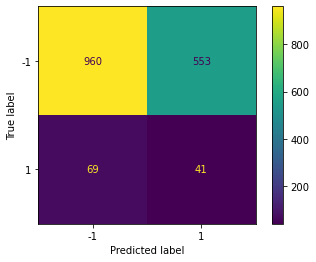

In [73]:
plot_confusion_matrix(rfc,df_pca_split2,y_split2)

C:\Users\gagan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


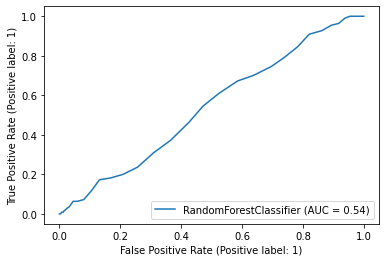

In [72]:
plot_roc_curve(rfc,df_pca_split2,y_split2)

In [74]:
print(classification_report(y_split2,predictions_rfc))

              precision    recall  f1-score   support

          -1       0.93      0.63      0.76      1513
           1       0.07      0.37      0.12       110

    accuracy                           0.62      1623
   macro avg       0.50      0.50      0.44      1623
weighted avg       0.87      0.62      0.71      1623



<AxesSubplot:xlabel='Class', ylabel='count'>

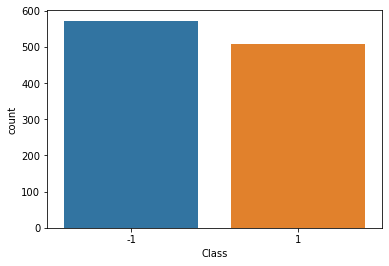

In [88]:
sns.countplot(data=df_train_split1,x='Class')

# Data rebalancing

### Although my data is near to balance but we will still try to balance it using SMOTE and NearMiss techniques

In [89]:
import imblearn

In [90]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(df_pca_split1, y_split1.ravel())

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '-1': {}".format(sum(y_train_res == -1)))

After OverSampling, counts of label '1': 572
After OverSampling, counts of label '-1': 572


### Now, I will use this balanced data to the previously used data with same parameters.

In [91]:
rfc_smote = RandomForestClassifier() # fit Random Classifier with SMOTE

rfc_smote.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [92]:
predictions_SMOTE = rfc_smote.predict(df_pca_split2)

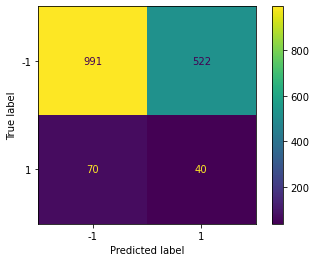

In [93]:
plot_confusion_matrix(rfc_smote,df_pca_split2,y_split2)

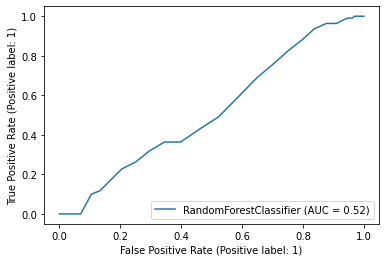

In [94]:
plot_roc_curve(rfc_smote,df_pca_split2,y_split2)

In [95]:
print(classification_report(y_split2,predictions_SMOTE))

              precision    recall  f1-score   support

          -1       0.93      0.65      0.77      1513
           1       0.07      0.36      0.12       110

    accuracy                           0.64      1623
   macro avg       0.50      0.51      0.44      1623
weighted avg       0.88      0.64      0.73      1623



### My data was previously very much balanced so there is not much difference between the previous model and oversmpled model.Now, We will try for Undersampling.

In [96]:
from imblearn.under_sampling import NearMiss
nr = NearMiss()
  
X_train_miss, y_train_miss = nr.fit_resample(df_pca_split1, y_split1.ravel())

print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '-1': {}".format(sum(y_train_miss == -1)))

After Undersampling, counts of label '1': 508
After Undersampling, counts of label '-1': 508


Again, we will try our  NearMiss model on this data to check any difference in performance.

In [97]:
rfc_miss = RandomForestClassifier()

rfc_miss.fit(X_train_miss,y_train_miss)

RandomForestClassifier()

In [98]:
predictions_miss = rfc_miss.predict(df_pca_split2)

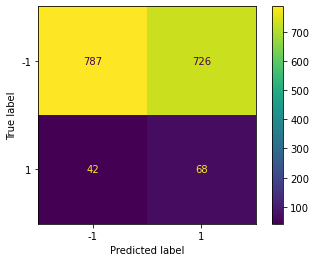

In [99]:
plot_confusion_matrix(rfc_miss,df_pca_split2,y_split2)

In [100]:
print(classification_report(y_split2,predictions_miss))

              precision    recall  f1-score   support

          -1       0.95      0.52      0.67      1513
           1       0.09      0.62      0.15       110

    accuracy                           0.53      1623
   macro avg       0.52      0.57      0.41      1623
weighted avg       0.89      0.53      0.64      1623



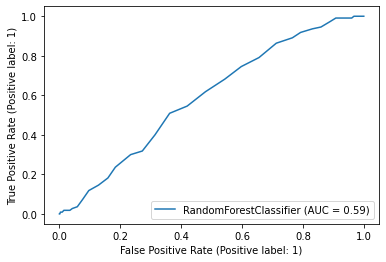

In [101]:
plot_roc_curve(rfc_miss,df_pca_split2,y_split2)

### As we can see, NearMiss Model performs slightly better than the other two.

### Also, we will try another classifier model to be sure that our model performs better or not.My choice is Decision Tree Classifier

In [102]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
dtc=DecisionTreeClassifier(class_weight='balanced',max_features='auto')

In [104]:

dtc.fit(df_pca_split1,y_split1)

DecisionTreeClassifier(class_weight='balanced', max_features='auto')

In [105]:
prediction_Dtree=dtc.predict(df_pca_split2)

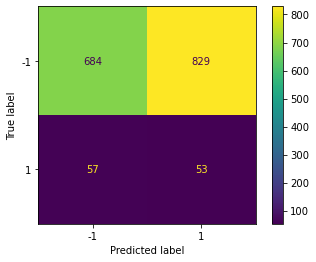

In [106]:
plot_confusion_matrix(dtc,df_pca_split2,y_split2)

In [107]:
print(classification_report(y_split2,prediction_Dtree))

              precision    recall  f1-score   support

          -1       0.92      0.45      0.61      1513
           1       0.06      0.48      0.11       110

    accuracy                           0.45      1623
   macro avg       0.49      0.47      0.36      1623
weighted avg       0.86      0.45      0.57      1623



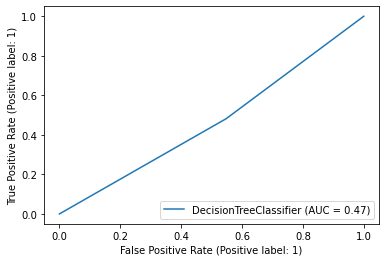

In [108]:
plot_roc_curve(dtc,df_pca_split2,y_split2)

### As we can observe, this model is performing poorly than the previous model with AUC =0.47

### After going through all EDA and pre-modelling steps, its time to automate the things and try to make an pipeline.

In [109]:
from sklearn.pipeline import Pipeline # For setting up pipeline
# Various pre-processing steps
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler

In [110]:
df_train_split1_features=df_train_split1.iloc[:,2:]

In [111]:
df_train_split2_features=df_train_split2.iloc[:,2:]

In [112]:
df_test.head()

,Info_cluster,Class,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,feat_esm1b_6,feat_esm1b_7,...,feat_esm1b_1270,feat_esm1b_1271,feat_esm1b_1272,feat_esm1b_1273,feat_esm1b_1274,feat_esm1b_1275,feat_esm1b_1276,feat_esm1b_1277,feat_esm1b_1278,feat_esm1b_1279
0,34,-1,-0.021067,-0.165189,0.173732,0.104066,-0.100211,-0.042768,-0.430647,-0.212912,...,-0.070886,-0.017200,-0.117530,-0.007250,-1.071874,-0.519040,-0.308719,-0.281276,-0.256712,0.405690
1,34,-1,0.026400,0.028715,0.093638,-0.046767,0.072711,-0.321925,-0.314515,0.071320,...,0.220630,-0.210780,-0.021335,0.323588,-0.736865,-0.343829,-0.507386,-0.020137,-0.166644,0.751316
2,34,-1,-0.140944,0.106401,0.205669,0.160118,-0.104789,-0.309539,-0.205587,0.058554,...,0.107350,-0.059491,-0.167905,0.257423,-0.930690,-0.271957,-0.133815,0.044392,-0.299376,0.461547
3,34,-1,0.120088,0.108923,-0.086904,0.196164,-0.251497,-0.205923,-0.483595,0.061114,...,0.253621,-0.267090,-0.109026,0.091992,-0.813677,-0.187964,-0.142268,0.091157,-0.436975,0.369129
4,34,-1,0.083401,0.060489,0.070889,-0.058935,-0.192792,-0.258103,-0.379416,0.123201,...,0.027382,0.018629,-0.157104,0.305302,-1.121274,-0.048636,-0.246171,0.147852,-0.299121,0.225209


In [113]:
df_test_features=df_test.iloc[:,2:]

In [114]:
y_test=df_test['Class']

In [180]:
from imblearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler


# Define the pipeline
pipeline = Pipeline([
    ('sampling', None), 
    ('scaler', StandardScaler()),
    ('selector', PCA()),
    ('classifier', RandomForestClassifier())
])

# Define the parameter grid for the pipeline steps
param_grid = {
    
    'sampling': [SMOTE(), NearMiss()],
    'sampling__sampling_strategy': ['minority', 'not minority', 'auto'],
    'scaler': [StandardScaler(), MinMaxScaler(),Normalizer(), MaxAbsScaler()],
    'selector__n_components':[50,150,200,250],
    'classifier__max_features': ['auto', 'sqrt'],
    'classifier__bootstrap' : [True,False],
    'classifier__oob_score' : [True,False]
}

# Define the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=2)

# Fit the GridSearchCV object on the training data
grid_search.fit(df_train_split1_features, y_split1)

# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters:  {'classifier__bootstrap': True, 'classifier__max_features': 'sqrt', 'classifier__oob_score': False, 'sampling': NearMiss(), 'sampling__sampling_strategy': 'auto', 'scaler': Normalizer(), 'selector__n_components': 250}
Best score:  0.5148148148148148


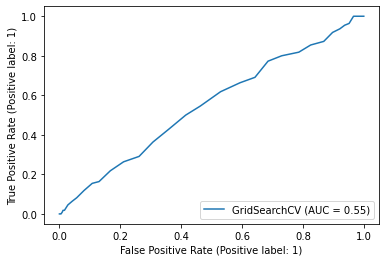

In [181]:
plot_roc_curve(grid_search,df_train_split2_features,y_split2)

# Checking model performance on test data

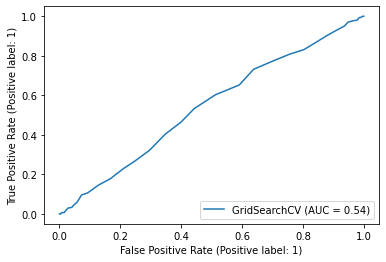

In [182]:
plot_roc_curve(grid_search,df_test_features,y_test)

In [183]:
predictions_test=grid_search.predict(df_test_features)

In [184]:
print(classification_report(y_test,predictions_test))

              precision    recall  f1-score   support

          -1       0.81      0.41      0.54      1083
           1       0.24      0.65      0.35       302

    accuracy                           0.46      1385
   macro avg       0.52      0.53      0.44      1385
weighted avg       0.68      0.46      0.50      1385



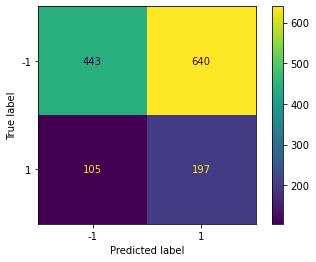

In [185]:
plot_confusion_matrix(grid_search,df_test_features,y_test)

In [189]:
df_val_features=df_val.iloc[:,2:]

In [194]:
y_df_val=df_val['Class']

# Checking Model performance on unseen Validation Data

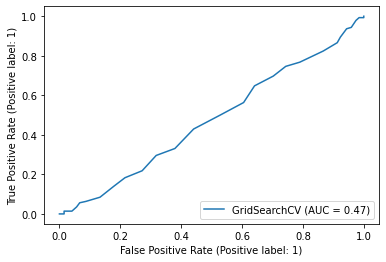

In [195]:
plot_roc_curve(grid_search,df_val_features,y_df_val)

### Model peformance on the Validation set decreased to 0.47(AUC)


# TASK 2

### After going through all the analysis, we will try to replicate all steps and make a new model on another bigger dataset.

In [116]:
df_3=pd.read_csv("C:\\Users\\gagan\\Downloads\\df_training_level3(1).csv") # load data

# EXPLORATORY DATA ANALYSIS

In [117]:
df_3.head()

,Info_PepID,Info_organism_id,Info_protein_id,Info_pos,Info_AA,Info_pubmed_id,Info_epitope_id,Info_host_id,Info_nPos,Info_nNeg,...,feat_esm1b_1270,feat_esm1b_1271,feat_esm1b_1272,feat_esm1b_1273,feat_esm1b_1274,feat_esm1b_1275,feat_esm1b_1276,feat_esm1b_1277,feat_esm1b_1278,feat_esm1b_1279
0,NP_775663.1:2,11072,NP_775663.1,2,T,8725101,64601,9606,2,1,...,0.235874,-0.186116,-0.007055,0.227716,-1.469320,0.024950,0.054577,0.142123,0.194421,0.471760
1,NP_775663.1:2,11072,NP_775663.1,3,K,8725101,64601,9606,2,1,...,0.014759,-0.119949,-0.016030,0.040704,-1.614884,0.189634,-0.049600,0.005898,0.128652,0.254778
2,NP_775663.1:2,11072,NP_775663.1,4,K,8725101,64601,9606,2,1,...,0.066743,-0.165863,-0.061832,0.026400,-1.353973,0.140752,-0.168214,0.114217,-0.002818,0.247916
3,NP_775663.1:2,11072,NP_775663.1,5,P,8725101,64601,9606,2,1,...,-0.148641,-0.088860,-0.218482,0.103855,-1.252338,-0.000789,0.049453,0.197773,0.034994,0.303203
4,NP_775663.1:2,11072,NP_775663.1,6,G,8725101,64601,9606,2,1,...,0.251960,-0.122903,-0.191698,0.142125,-0.985092,0.029431,0.176924,0.302354,-0.138180,0.136602


In [118]:
df_3.info(verbose=True, show_counts=True) #check for general info and NaN numbers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72663 entries, 0 to 72662
Data columns (total 1294 columns):
 #     Column            Non-Null Count  Dtype  
---    ------            --------------  -----  
 0     Info_PepID        72663 non-null  object 
 1     Info_organism_id  72663 non-null  int64  
 2     Info_protein_id   72663 non-null  object 
 3     Info_pos          72663 non-null  int64  
 4     Info_AA           72663 non-null  object 
 5     Info_pubmed_id    72663 non-null  object 
 6     Info_epitope_id   72663 non-null  object 
 7     Info_host_id      72663 non-null  object 
 8     Info_nPos         72663 non-null  object 
 9     Info_nNeg         72663 non-null  object 
 10    Info_type         72663 non-null  object 
 11    Info_window       72663 non-null  object 
 12    Info_cluster      72663 non-null  int64  
 13    Class             72663 non-null  int64  
 14    feat_esm1b_0      70751 non-null  float64
 15    feat_esm1b_1      70751 non-null  float64
 16    

In [119]:
missing_values_columns_df3=df_3.isnull().sum()

In [120]:
missing_values_columns_df3

Info_PepID             0
Info_organism_id       0
Info_protein_id        0
Info_pos               0
Info_AA                0
                    ... 
feat_esm1b_1275     1912
feat_esm1b_1276     1912
feat_esm1b_1277     1912
feat_esm1b_1278     1912
feat_esm1b_1279     1912
Length: 1294, dtype: int64

In [121]:
percent_missing_columns_df3=100*missing_values_columns_df3  / len(df_3)
sorted_missing_columns_df3 = percent_missing_columns_df3.sort_values(ascending=False)

In [122]:
sorted_missing_columns_df3

feat_esm1b_633    2.631325
feat_esm1b_876    2.631325
feat_esm1b_854    2.631325
feat_esm1b_853    2.631325
feat_esm1b_852    2.631325
                    ...   
Info_type         0.000000
Info_window       0.000000
Info_cluster      0.000000
Class             0.000000
Info_PepID        0.000000
Length: 1294, dtype: float64

In [123]:
df_3.isnull().sum(axis=1).value_counts()

0       70751
1280     1912
dtype: int64

In [124]:
null_data_rows_df3 = df_3[df_3.isnull().any(axis=1)]

In [125]:
null_data_rows_df3

,Info_PepID,Info_organism_id,Info_protein_id,Info_pos,Info_AA,Info_pubmed_id,Info_epitope_id,Info_host_id,Info_nPos,Info_nNeg,...,feat_esm1b_1270,feat_esm1b_1271,feat_esm1b_1272,feat_esm1b_1273,feat_esm1b_1274,feat_esm1b_1275,feat_esm1b_1276,feat_esm1b_1277,feat_esm1b_1278,feat_esm1b_1279
8936,AAA03191.1:7,1678143,AAA03191.1,659,E,"1373890,10686019","34022,65190","9606,10116","0,2","1,1",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8937,AAA03191.1:7,1678143,AAA03191.1,660,L,"1373890,10686019","34022,65190","9606,10116","0,2","1,1",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9455,AAA45676.1:26,2847144,AAA45676.1,469,W,1373489,"48496,15446,72489","9598,9606","2,2,2","0,0,0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9456,AAA45676.1:26,2847144,AAA45676.1,470,G,1373489,"48496,15446,72489","9598,9606","2,2,2","0,0,0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9753,Q68948:6,11103,Q68948,397,R,8986952,79075,9606,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42083,ACR56298.1:2,1678143,ACR56298.1,412,L,34129082,1597199,10000000,11,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42084,ACR56298.1:2,1678143,ACR56298.1,413,Y,34129082,1597199,10000000,11,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42085,ACR56298.1:2,1678143,ACR56298.1,414,T,34129082,1597199,10000000,11,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42086,ACR56298.1:2,1678143,ACR56298.1,415,S,34129082,1597199,10000000,11,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
null_data_rows_df3['Info_cluster'].value_counts()

28    1365
34     488
39      33
62      26
Name: Info_cluster, dtype: int64

### Drop all rows with Nan

In [127]:
df_3=df_3.dropna(how='any')

In [128]:
len(df_3)

70751

In [129]:
df_3['Info_cluster'].value_counts()

8      45971
28     19349
35      1623
34      1145
150      564
62       524
204      516
36       244
225      240
50        87
298       69
229       54
587       50
232       45
198       43
320       42
219       38
199       30
44        27
215       20
489       20
206       20
222       15
264        8
256        7
Name: Info_cluster, dtype: int64

In [130]:
df3_features = df_3.iloc[:, 12:] # separating Info Columns from feat columns but to retain "Class" and "Info_cluster" column 

In [131]:
df3_features

,Info_cluster,Class,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,feat_esm1b_6,feat_esm1b_7,...,feat_esm1b_1270,feat_esm1b_1271,feat_esm1b_1272,feat_esm1b_1273,feat_esm1b_1274,feat_esm1b_1275,feat_esm1b_1276,feat_esm1b_1277,feat_esm1b_1278,feat_esm1b_1279
0,8,1,0.115278,0.105343,0.256809,0.205551,-0.162306,-0.250113,-0.039983,-0.221369,...,0.235874,-0.186116,-0.007055,0.227716,-1.469320,0.024950,0.054577,0.142123,0.194421,0.471760
1,8,1,0.048915,-0.060122,0.054565,0.130224,-0.243280,0.032289,-0.035078,0.149056,...,0.014759,-0.119949,-0.016030,0.040704,-1.614884,0.189634,-0.049600,0.005898,0.128652,0.254778
2,8,1,0.029908,-0.069993,0.144604,0.031607,-0.157991,0.096214,-0.073147,0.150113,...,0.066743,-0.165863,-0.061832,0.026400,-1.353973,0.140752,-0.168214,0.114217,-0.002818,0.247916
3,8,1,-0.017817,0.063682,0.196507,0.219516,0.010169,0.048974,-0.102324,-0.071483,...,-0.148641,-0.088860,-0.218482,0.103855,-1.252338,-0.000789,0.049453,0.197773,0.034994,0.303203
4,8,1,0.183947,-0.002784,0.185983,0.299326,-0.256938,0.004182,-0.194807,-0.299934,...,0.251960,-0.122903,-0.191698,0.142125,-0.985092,0.029431,0.176924,0.302354,-0.138180,0.136602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72658,8,1,-0.060893,0.387238,0.030345,0.005711,-0.147543,0.013120,-0.260891,0.104144,...,0.289453,-0.096301,0.030024,0.195304,-0.801965,-0.274976,0.178286,0.165846,0.177845,0.332194
72659,8,1,0.199185,0.368873,0.180725,0.057800,-0.017099,-0.028999,-0.153706,-0.175476,...,0.250574,-0.246241,0.077579,-0.052833,-0.979619,-0.031028,0.186897,0.133366,0.157032,0.341441
72660,8,1,-0.180276,0.448252,-0.102101,0.106668,-0.206699,-0.118161,0.044999,-0.046077,...,0.170998,-0.051927,-0.083331,0.035247,-1.028582,-0.234735,-0.006005,0.206064,0.058616,0.237192
72661,8,1,-0.274478,0.362613,0.431246,0.164276,-0.130307,-0.204145,0.203404,-0.083181,...,0.148796,-0.283643,0.028591,0.037022,-1.073474,-0.182251,0.221717,0.074508,0.227138,0.319858


In [132]:
df3_features.groupby(['Info_cluster','Class'])['Info_cluster'].count()

Info_cluster  Class
8             -1       17738
               1       28233
28            -1       11199
               1        8150
34            -1        1083
               1          62
35            -1        1513
               1         110
36            -1         183
               1          61
44            -1          27
50             1          87
62            -1         186
               1         338
150           -1         283
               1         281
198           -1          12
               1          31
199            1          30
204           -1         289
               1         227
206            1          20
215            1          20
219            1          38
222            1          15
225           -1         182
               1          58
229            1          54
232            1          45
256            1           7
264            1           8
298            1          69
320            1          42
489            1       

### As this data is too big, I have divided this data in the ratio of 30:10:60

In [133]:
train_clusters_3 = [28,34]#30%
test_clusters_3 = [35,36,44,50,62,150,198,199,204,206,215,219,222,225,229,232,256,264,298,320,489,587]#10%
val_clusters_3 = [8]#60%

In [134]:
df3_train = df3_features[df3_features['Info_cluster'].isin(train_clusters_3)]
df3_test = df3_features[df3_features['Info_cluster'].isin(test_clusters_3)]
df3_val = df3_features[df3_features['Info_cluster'].isin(val_clusters_3)]

In [135]:
df3_train

,Info_cluster,Class,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,feat_esm1b_6,feat_esm1b_7,...,feat_esm1b_1270,feat_esm1b_1271,feat_esm1b_1272,feat_esm1b_1273,feat_esm1b_1274,feat_esm1b_1275,feat_esm1b_1276,feat_esm1b_1277,feat_esm1b_1278,feat_esm1b_1279
2286,28,1,0.212001,0.062904,0.185864,-0.019589,-0.065609,-0.278875,-0.170339,-0.010553,...,0.154699,-0.292271,0.026188,0.034219,-0.968343,-0.445086,-0.011801,-0.025558,0.437062,0.278237
2287,28,1,0.121563,0.098750,0.237844,0.084252,-0.032137,-0.345005,-0.256686,0.326289,...,0.285643,-0.262454,-0.069371,-0.055549,-1.160192,-0.485529,0.150904,-0.028739,0.263258,0.299872
2288,28,1,-0.069215,-0.078793,0.402194,0.210133,-0.107397,-0.261135,-0.023093,-0.146772,...,0.091140,-0.192479,-0.088214,-0.010550,-1.009358,-0.398366,0.158658,0.088414,0.355336,0.051114
2289,28,1,-0.026339,0.042603,0.256887,0.139137,-0.000566,-0.159677,-0.217161,0.108417,...,-0.044238,-0.158551,-0.092264,0.033553,-1.087213,-0.433534,0.046827,0.175849,0.268341,0.183689
2290,28,1,0.145143,0.005153,0.381906,-0.056496,-0.089662,-0.155722,-0.197382,0.142543,...,0.258490,-0.065634,-0.065864,0.232455,-1.231857,-0.375971,0.065628,0.217557,0.281381,0.011128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72558,28,1,-0.091246,0.038807,0.217220,0.039272,-0.028671,-0.132733,0.114459,-0.224060,...,0.058334,0.055287,-0.130784,-0.089760,-0.952082,-0.226292,0.286728,-0.024160,0.097425,-0.090497
72559,28,1,0.151932,0.195781,0.083136,0.050513,0.343985,-0.020885,-0.039949,0.063086,...,-0.074634,-0.006478,-0.086606,0.180474,-0.810862,-0.142334,0.150792,0.132268,0.209378,0.287518
72560,28,1,0.166600,0.120224,0.210492,0.021703,0.279427,0.070583,-0.048812,-0.027006,...,-0.174998,-0.031194,-0.032654,0.106340,-0.987031,-0.202794,-0.010864,0.137075,0.234102,0.290143
72561,28,1,0.071517,-0.019048,0.503738,0.175763,-0.092800,0.032902,-0.008883,-0.267186,...,-0.214277,-0.072808,-0.212393,-0.068707,-1.172267,-0.122812,0.268313,0.040836,-0.010147,0.209152


In [136]:
df3_train_features=df3_train.iloc[:,2:]

In [137]:
df3_train_features

,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,feat_esm1b_6,feat_esm1b_7,feat_esm1b_8,feat_esm1b_9,...,feat_esm1b_1270,feat_esm1b_1271,feat_esm1b_1272,feat_esm1b_1273,feat_esm1b_1274,feat_esm1b_1275,feat_esm1b_1276,feat_esm1b_1277,feat_esm1b_1278,feat_esm1b_1279
2286,0.212001,0.062904,0.185864,-0.019589,-0.065609,-0.278875,-0.170339,-0.010553,-0.068039,0.087370,...,0.154699,-0.292271,0.026188,0.034219,-0.968343,-0.445086,-0.011801,-0.025558,0.437062,0.278237
2287,0.121563,0.098750,0.237844,0.084252,-0.032137,-0.345005,-0.256686,0.326289,-0.171088,-0.139342,...,0.285643,-0.262454,-0.069371,-0.055549,-1.160192,-0.485529,0.150904,-0.028739,0.263258,0.299872
2288,-0.069215,-0.078793,0.402194,0.210133,-0.107397,-0.261135,-0.023093,-0.146772,-0.014373,0.004706,...,0.091140,-0.192479,-0.088214,-0.010550,-1.009358,-0.398366,0.158658,0.088414,0.355336,0.051114
2289,-0.026339,0.042603,0.256887,0.139137,-0.000566,-0.159677,-0.217161,0.108417,-0.039309,0.006610,...,-0.044238,-0.158551,-0.092264,0.033553,-1.087213,-0.433534,0.046827,0.175849,0.268341,0.183689
2290,0.145143,0.005153,0.381906,-0.056496,-0.089662,-0.155722,-0.197382,0.142543,-0.132432,-0.152422,...,0.258490,-0.065634,-0.065864,0.232455,-1.231857,-0.375971,0.065628,0.217557,0.281381,0.011128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72558,-0.091246,0.038807,0.217220,0.039272,-0.028671,-0.132733,0.114459,-0.224060,0.351107,0.041067,...,0.058334,0.055287,-0.130784,-0.089760,-0.952082,-0.226292,0.286728,-0.024160,0.097425,-0.090497
72559,0.151932,0.195781,0.083136,0.050513,0.343985,-0.020885,-0.039949,0.063086,0.046028,-0.302224,...,-0.074634,-0.006478,-0.086606,0.180474,-0.810862,-0.142334,0.150792,0.132268,0.209378,0.287518
72560,0.166600,0.120224,0.210492,0.021703,0.279427,0.070583,-0.048812,-0.027006,0.096369,-0.192823,...,-0.174998,-0.031194,-0.032654,0.106340,-0.987031,-0.202794,-0.010864,0.137075,0.234102,0.290143
72561,0.071517,-0.019048,0.503738,0.175763,-0.092800,0.032902,-0.008883,-0.267186,0.180382,-0.073429,...,-0.214277,-0.072808,-0.212393,-0.068707,-1.172267,-0.122812,0.268313,0.040836,-0.010147,0.209152


### check skewness for potential outliers

In [138]:
skewness = df3_train_features.skew()



# Find columns with skewness greater than 2
skewed_columns_greater = skewness[skewness > 2].index

# Find columns with skewness less than 2
skewed_columns_less = skewness[skewness < -2].index

# Combine columns with skewness greater than 2 and less than 2
combined_columns = skewed_columns_greater.union(skewed_columns_less)

# Create a new DataFrame with the combined columns
combined_df = df3_features[combined_columns]

print("Combined DataFrame:\n", combined_df)


Combined DataFrame:
        feat_esm1b_1013  feat_esm1b_450
0            -0.213501       -1.601848
1            -0.250805       -1.698388
2            -0.255762       -1.684192
3            -0.276013       -1.623687
4            -0.345553       -1.818219
...                ...             ...
72658        -0.182540       -1.985287
72659        -0.233795       -2.001337
72660        -0.066933       -1.898410
72661        -0.029912       -1.984123
72662         0.050743       -1.922833

[70751 rows x 2 columns]


In [139]:
print(df3_train_features['feat_esm1b_450'].quantile(0.10))
print(df3_train_features['feat_esm1b_450'].quantile(0.90))

-2.0049112558364888
-1.1158270299434674


### Replacing all outlier values with flooring and capping values.

In [140]:
df3_train_features["feat_esm1b_450"] = np.where(df3_train_features["feat_esm1b_450"] <df3_train_features['feat_esm1b_450'].quantile(0.10), df3_train_features['feat_esm1b_450'].quantile(0.10),df3_train_features['feat_esm1b_450'])
df3_train_features["feat_esm1b_450"] = np.where(df3_train_features["feat_esm1b_450"] >df3_train_features['feat_esm1b_450'].quantile(0.90), df3_train_features['feat_esm1b_450'].quantile(0.90),df3_train_features['feat_esm1b_450'])
print(df3_train_features['feat_esm1b_450'].skew())

1.5461625354921729


In [141]:
print(df3_train_features['feat_esm1b_1013'].quantile(0.10))
print(df3_train_features['feat_esm1b_1013'].quantile(0.90))

-0.29594361409544945
0.13607540689408804


In [142]:
df3_train_features["feat_esm1b_1013"] = np.where(df3_train_features["feat_esm1b_1013"] <df3_train_features['feat_esm1b_1013'].quantile(0.10), df3_train_features['feat_esm1b_1013'].quantile(0.10),df3_train_features['feat_esm1b_1013'])
df3_train_features["feat_esm1b_1013"] = np.where(df3_train_features["feat_esm1b_1013"] >df3_train_features['feat_esm1b_1013'].quantile(0.90), df3_train_features['feat_esm1b_1013'].quantile(0.90),df3_train_features['feat_esm1b_1013'])
print(df3_train_features['feat_esm1b_1013'].skew())

-0.24205492837261364


# Pre-Processing

In [143]:
scaler_df3=MinMaxScaler()

In [144]:
scaler_df3.fit(df3_train_features)

MinMaxScaler()

In [145]:
df3_train_features_scaled=scaler_df3.transform(df3_train_features)

### Now, I will try to generate a partial elbow graph to check minimum number of cmponents required for best model performance

In [238]:
explained_variance_df3 = []

for n in range(100,250):
    pca_df3 = PCA(n_components=n)
    P_components_df3=pca_df3.fit_transform(df3_train_features_scaled)
    
    explained_variance_df3.append(np.sum(pca_df3.explained_variance_ratio_))

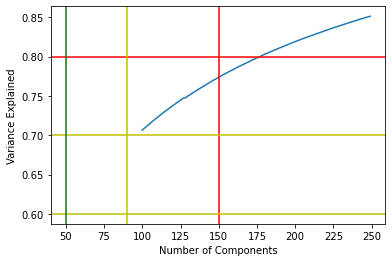

In [239]:
plt.plot(range(100,250),explained_variance_df3)
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained")
plt.axhline(y=0.80, color='r')
plt.axvline(x=150, color='r')

plt.axhline(y=0.70, color='y')
plt.axvline(x=90, color='y')

plt.axhline(y=0.6, color='y')
plt.axvline(x=50, color='g')

### As we can see from above graph, any number of components that are more than 150 will explain more than 70% of data.

### Graph to check for data imbalance

<AxesSubplot:xlabel='Class', ylabel='count'>

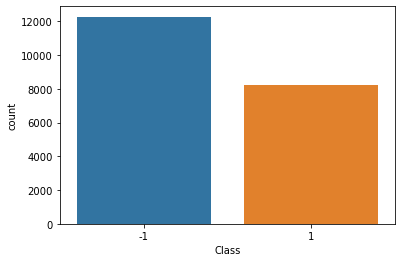

In [148]:
sns.countplot(x=df3_train['Class'])

# Feature Reduction

### Creating Principal Components training data

In [149]:
pca_df3 = PCA(n_components=150)
P_components_df3=pca_df3.fit_transform(df3_train_features_scaled)
df3_pca = pd.DataFrame(data=P_components_df3, index=df3_train_features.index)

In [150]:
y_train_df3=df3_train['Class']

# Modelling

In [152]:
rfc_df3 = RandomForestClassifier().fit(df3_pca,y_train_df3)

In [153]:
df3_test_features=df3_test.iloc[:,2:]

In [154]:
df3_test_features

,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,feat_esm1b_6,feat_esm1b_7,feat_esm1b_8,feat_esm1b_9,...,feat_esm1b_1270,feat_esm1b_1271,feat_esm1b_1272,feat_esm1b_1273,feat_esm1b_1274,feat_esm1b_1275,feat_esm1b_1276,feat_esm1b_1277,feat_esm1b_1278,feat_esm1b_1279
6655,0.053442,-0.118947,0.305982,0.115797,-0.070483,-0.053626,-0.100090,-0.027533,-0.161895,-0.031956,...,-0.146789,0.108406,0.126869,0.185259,-0.460547,-0.170926,-0.120551,0.122495,-0.129387,0.049911
6656,0.303059,-0.121561,0.032785,0.053781,-0.342253,-0.098895,-0.252247,-0.071756,-0.168585,0.052700,...,0.039418,-0.136333,-0.066101,0.359679,-1.489768,-0.080543,0.103032,-0.019953,0.082606,0.283611
6657,-0.009707,0.104942,-0.133511,0.072751,-0.156131,-0.099091,-0.142077,-0.155829,-0.336115,0.079102,...,0.107810,-0.122576,-0.171229,0.381013,-1.297186,-0.024779,0.167487,0.366667,0.102095,0.212318
6658,0.178657,0.123151,0.060571,-0.095855,-0.295164,-0.151600,-0.110435,0.020327,-0.161581,-0.014856,...,0.138005,0.078371,0.012332,-0.047585,-1.185170,-0.203777,-0.079107,0.145049,0.136585,0.315026
6659,0.104734,0.163018,-0.078343,0.143531,-0.094094,-0.128864,-0.302301,0.135215,-0.223730,-0.065067,...,0.264376,-0.014597,0.074889,0.265639,-1.407780,-0.050073,0.009404,0.114800,0.152620,0.305590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72546,0.177227,0.180680,0.059261,0.279202,-0.270928,-0.077174,-0.203567,-0.147692,-0.270651,-0.135177,...,0.123036,-0.254041,-0.032769,0.125973,-0.949523,0.036121,0.158592,0.001849,-0.260797,0.048206
72547,0.268151,0.066381,0.025913,-0.071685,-0.170750,0.081978,-0.174082,-0.036863,-0.202384,0.114752,...,-0.017699,-0.024063,-0.120011,0.074959,-1.181880,0.058818,-0.007335,-0.077530,-0.252814,0.041319
72548,-0.001398,-0.031359,0.047162,0.009773,-0.229375,0.004785,-0.223332,0.022969,-0.080965,-0.101525,...,0.010499,-0.004848,0.083258,-0.051507,-1.412716,-0.078910,-0.172033,-0.326434,-0.397079,0.096522
72549,-0.099542,0.048276,0.101923,-0.003934,-0.027927,-0.130126,-0.223121,-0.090362,-0.013929,0.004609,...,0.070045,-0.000121,-0.000008,0.010108,-1.352967,0.000497,-0.035766,-0.101157,-0.178039,0.298739


### scaling data

In [155]:
scaler_df3.fit(df3_test_features)
df3_test_features_scaled=scaler_df3.transform(df3_test_features)

### creating components for test data

In [156]:
pca_test_df3 = PCA(n_components=150)
P_components_test_df3=pca_test_df3.fit_transform(df3_test_features_scaled)
df3_pca_test = pd.DataFrame(data=P_components_test_df3, index=df3_test_features.index)

### predicting values for Test data

In [157]:
prediction_rfc_df3=rfc_df3.predict(df3_pca_test)

In [158]:
y_test_df3=df3_test['Class']

# Model Assessment

### ROC curve and AUC score

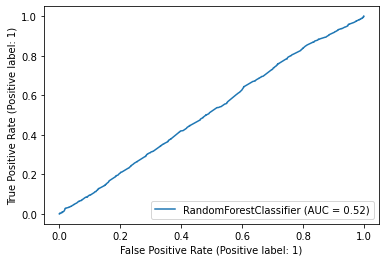

In [159]:
plot_roc_curve(rfc_df3,df3_pca_test,y_test_df3)

In [160]:
prediction_df3_test=rfc_df3.predict(df3_pca_test)

### plotting Confusion Matrix

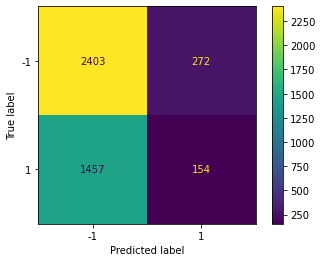

In [161]:
plot_confusion_matrix(rfc_df3,df3_pca_test,y_test_df3)

In [162]:
print(classification_report(y_test_df3,prediction_df3_test))

              precision    recall  f1-score   support

          -1       0.62      0.90      0.74      2675
           1       0.36      0.10      0.15      1611

    accuracy                           0.60      4286
   macro avg       0.49      0.50      0.44      4286
weighted avg       0.52      0.60      0.52      4286



# Data Rebalancing

### Oversampling the data using SMOTE

In [163]:
from imblearn.over_sampling import SMOTE
sm_df3 = SMOTE(random_state = 2)
X_train_res_df3, y_train_res_df3 = sm_df3.fit_resample(df3_pca, y_train_df3.ravel())

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res_df3 == 1)))
print("After OverSampling, counts of label '-1': {}".format(sum(y_train_res_df3 == -1)))

After OverSampling, counts of label '1': 12282
After OverSampling, counts of label '-1': 12282


In [ ]:
### Training the model

In [164]:
rfc_smote_df3 = RandomForestClassifier()

rfc_smote_df3.fit(X_train_res_df3,y_train_res_df3)

RandomForestClassifier()

In [165]:
predictions_SMOTE_df3 = rfc_smote_df3.predict(df3_pca_test)

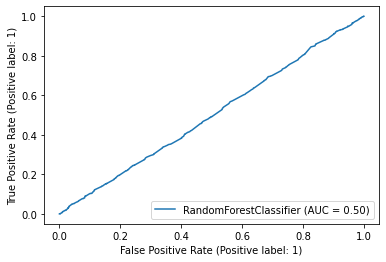

In [166]:
plot_roc_curve(rfc_smote_df3,df3_pca_test,y_test_df3)

### As we can see, AUC score for the above model is 0.50

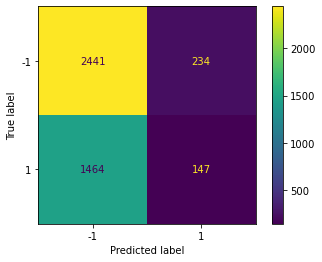

In [167]:
plot_confusion_matrix(rfc_smote_df3,df3_pca_test,y_test_df3)

In [168]:
print(classification_report(y_test_df3,predictions_SMOTE_df3))

              precision    recall  f1-score   support

          -1       0.63      0.91      0.74      2675
           1       0.39      0.09      0.15      1611

    accuracy                           0.60      4286
   macro avg       0.51      0.50      0.44      4286
weighted avg       0.54      0.60      0.52      4286



### Now we will try the modelling using undersampling(NearMiss)

In [169]:
from imblearn.under_sampling import NearMiss
nr = NearMiss()
  
X_train_miss_df3, y_train_miss_df3 = nr.fit_resample(df3_pca, y_train_df3.ravel())

print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss_df3 == 1)))
print("After Undersampling, counts of label '-1': {}".format(sum(y_train_miss_df3 == -1)))

After Undersampling, counts of label '1': 8212
After Undersampling, counts of label '-1': 8212


In [170]:
rfc_miss_df3 = RandomForestClassifier()

rfc_miss_df3.fit(X_train_miss_df3,y_train_miss_df3)

RandomForestClassifier()

In [171]:
predictions_miss_df3 = rfc_miss_df3.predict(df3_pca_test)

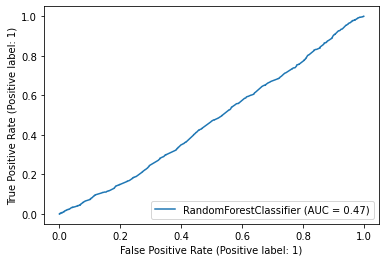

In [172]:
plot_roc_curve(rfc_miss_df3,df3_pca_test,y_test_df3)

### AUC score got reduced to 0.47

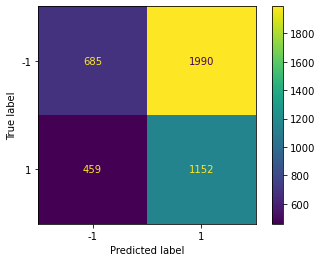

In [173]:
plot_confusion_matrix(rfc_miss_df3,df3_pca_test,y_test_df3)

In [174]:
print(classification_report(y_test_df3,predictions_miss_df3))

              precision    recall  f1-score   support

          -1       0.60      0.26      0.36      2675
           1       0.37      0.72      0.48      1611

    accuracy                           0.43      4286
   macro avg       0.48      0.49      0.42      4286
weighted avg       0.51      0.43      0.41      4286



### Now its time to create optimized pipeline.

In [175]:
from imblearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler


# Define the pipeline
pipeline_df3 = Pipeline([
    ('sampling', None), 
    ('scaler', StandardScaler()),
    ('selector', PCA()),
    ('classifier', RandomForestClassifier())
])

# Define the parameter grid for the pipeline steps
param_grid = {
    
    'sampling': [SMOTE(), NearMiss()],
    'sampling__sampling_strategy': ['minority', 'not minority', 'auto'],
    'scaler': [StandardScaler(), MinMaxScaler(),Normalizer(), MaxAbsScaler()],
    'selector__n_components':[150,200,250,300],
    'classifier__max_features': ['auto', 'sqrt'],
    'classifier__bootstrap' : [True,False],
    'classifier__oob_score' : [True,False]
}

# Define the GridSearchCV object
grid_search_df3 = GridSearchCV(pipeline_df3, param_grid=param_grid, cv=2)

# Fit the GridSearchCV object on the training data
grid_search_df3.fit(df3_train_features, y_train_df3)

# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search_df3.best_params_)
print("Best score: ", grid_search_df3.best_score_)

Best parameters:  {'classifier__bootstrap': True, 'classifier__max_features': 'auto', 'classifier__oob_score': False, 'sampling': SMOTE(sampling_strategy='not minority'), 'sampling__sampling_strategy': 'not minority', 'scaler': MinMaxScaler(), 'selector__n_components': 150}
Best score:  0.6587781789792134


# Model Assessment

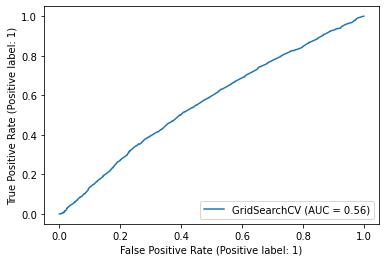

In [176]:
plot_roc_curve(grid_search_df3,df3_test_features,y_test_df3)

In [177]:
df3_val_features=df3_val.iloc[:,2:]

In [178]:
y_val_df3=df3_val['Class']

## Plotting ROC curve and AUC score for Validation dataset

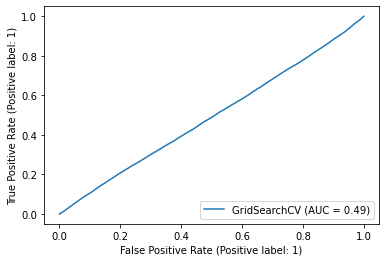

In [179]:
plot_roc_curve(grid_search_df3,df3_val_features,y_val_df3)

### As we can see that model performance on Validation set for both the set is around in the range of AUC=0.47-0.49

### Hence, it is very probable that the model performance on the Holdout dataset will be in the range of AUC score between __0.46-0.55__.

# TASK 3

## Now getting predictions on the Holdout dataset.

In [196]:
df_example=pd.read_csv("C:\\Users\\gagan\\Downloads\\predictions.csv")

In [197]:
df_example

,Info_PepID,Info_pos,Prediction
0,AAO33335.1:6,485,-1
1,NP_819006.1:2,137,1
2,ACN87270.1:6,482,-1
3,AAF04801.1:5,357,-1
4,P03315.1:9,740,1
5,NP_819006.1:4,252,1
6,BAU70755.1:4,425,1
7,CAA44845.1:4,525,-1
8,CAA44845.1:7,656,-1
9,CAA44845.1:4,445,-1


In [198]:
df_holdout=pd.read_csv("C:\\Users\\gagan\\Downloads\\df_holdout.csv")

In [199]:
df_holdout

,Info_PepID,Info_organism_id,Info_protein_id,Info_pos,Info_AA,Info_pubmed_id,Info_epitope_id,Info_host_id,Info_nPos,Info_nNeg,...,feat_esm1b_1270,feat_esm1b_1271,feat_esm1b_1272,feat_esm1b_1273,feat_esm1b_1274,feat_esm1b_1275,feat_esm1b_1276,feat_esm1b_1277,feat_esm1b_1278,feat_esm1b_1279
0,P09592.2:2,11038,P09592.2,335,S,7543231,61574,"10000630,10000000,9796,10090",16,1,...,0.184423,-0.365618,0.010080,0.096566,-0.960775,-0.156839,0.158392,0.048518,0.281166,-0.032484
1,P09592.2:2,11038,P09592.2,336,T,7543231,61574,"10000630,10000000,9796,10090",16,1,...,0.226971,-0.114832,0.164078,0.130090,-0.612997,-0.238846,0.119155,0.057558,0.407512,0.249497
2,P09592.2:2,11038,P09592.2,337,E,7543231,61574,"10000630,10000000,9796,10090",16,1,...,0.043181,-0.020107,0.116864,0.209473,-1.431582,-0.267069,0.189000,-0.132716,0.095953,0.226894
3,P09592.2:2,11038,P09592.2,338,E,7543231,61574,"10000630,10000000,9796,10090",16,1,...,0.043961,-0.145467,0.141799,0.179857,-1.690106,-0.297599,0.164780,-0.076979,0.127177,0.066627
4,P09592.2:2,11038,P09592.2,339,L,7543231,61574,"10000630,10000000,9796,10090",16,1,...,0.035394,-0.102814,-0.073765,-0.007433,-1.364441,-0.152654,0.241466,0.248577,0.234493,0.122653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,NP_819008.1:2,11033,NP_819008.1,91,G,15016852,75286,10090,2,0,...,0.388227,-0.402553,-0.145885,0.111998,-0.559125,-0.071736,0.205298,0.100138,0.179883,0.189209
2037,NP_819008.1:2,11033,NP_819008.1,92,A,15016852,75286,10090,2,0,...,0.084918,-0.281085,-0.132305,0.081150,-1.003023,-0.241492,-0.074757,0.094412,0.125829,0.184184
2038,NP_819008.1:2,11033,NP_819008.1,93,Y,15016852,75286,10090,2,0,...,0.225188,-0.225527,-0.029320,0.218768,-1.242524,0.140508,-0.144615,-0.055780,0.225362,0.383161
2039,NP_819008.1:2,11033,NP_819008.1,94,C,15016852,75286,10090,2,0,...,0.068623,-0.141263,0.017812,0.014763,-0.679066,0.010850,-0.044415,0.186649,0.142375,0.151573


In [204]:
df_holdout_features=df_holdout.iloc[:,13:]

In [205]:
df_holdout_features

,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,feat_esm1b_6,feat_esm1b_7,feat_esm1b_8,feat_esm1b_9,...,feat_esm1b_1270,feat_esm1b_1271,feat_esm1b_1272,feat_esm1b_1273,feat_esm1b_1274,feat_esm1b_1275,feat_esm1b_1276,feat_esm1b_1277,feat_esm1b_1278,feat_esm1b_1279
0,-0.016402,0.385623,0.369218,0.145047,0.162395,-0.289442,0.072393,0.045740,0.128282,0.344542,...,0.184423,-0.365618,0.010080,0.096566,-0.960775,-0.156839,0.158392,0.048518,0.281166,-0.032484
1,-0.016490,0.200233,0.308936,-0.008177,-0.018847,-0.509022,0.069447,0.117018,-0.173068,0.229850,...,0.226971,-0.114832,0.164078,0.130090,-0.612997,-0.238846,0.119155,0.057558,0.407512,0.249497
2,-0.006767,0.174740,0.115804,-0.071989,-0.092009,-0.187360,-0.293373,-0.144830,-0.265530,-0.064230,...,0.043181,-0.020107,0.116864,0.209473,-1.431582,-0.267069,0.189000,-0.132716,0.095953,0.226894
3,0.058608,0.168276,0.086705,-0.025356,-0.073806,-0.000431,-0.170385,-0.051628,-0.157859,-0.021183,...,0.043961,-0.145467,0.141799,0.179857,-1.690106,-0.297599,0.164780,-0.076979,0.127177,0.066627
4,0.038290,0.147218,0.068720,0.120893,0.078472,-0.094862,-0.217352,0.374518,-0.234353,-0.025302,...,0.035394,-0.102814,-0.073765,-0.007433,-1.364441,-0.152654,0.241466,0.248577,0.234493,0.122653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,0.165970,0.193738,0.094305,0.041132,-0.200503,0.123520,-0.196257,-0.215846,-0.361902,-0.088894,...,0.388227,-0.402553,-0.145885,0.111998,-0.559125,-0.071736,0.205298,0.100138,0.179883,0.189209
2037,0.055721,0.273031,0.145731,0.013999,-0.213834,0.158513,0.119459,-0.114731,-0.144685,0.052550,...,0.084918,-0.281085,-0.132305,0.081150,-1.003023,-0.241492,-0.074757,0.094412,0.125829,0.184184
2038,0.053828,0.277536,0.000564,-0.251383,0.022802,0.006842,-0.188498,0.014508,0.027436,0.104438,...,0.225188,-0.225527,-0.029320,0.218768,-1.242524,0.140508,-0.144615,-0.055780,0.225362,0.383161
2039,0.071304,0.334002,0.274222,-0.031127,-0.188152,0.121886,-0.231051,0.124551,-0.132090,-0.089186,...,0.068623,-0.141263,0.017812,0.014763,-0.679066,0.010850,-0.044415,0.186649,0.142375,0.151573


In [206]:
predictions_holdout = grid_search_df3.predict(df_holdout_features)

In [207]:
predictions_holdout

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [217]:
df_prediction=pd.DataFrame(predictions_holdout,index=df_holdout.index)

In [219]:
df_prediction.columns=['Prediction']

In [220]:
df_prediction

,Prediction
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
2036,-1
2037,-1
2038,-1
2039,-1


In [221]:
df_holdout_final=pd.concat([df_holdout['Info_PepID'],df_holdout['Info_pos'],df_prediction],axis=1)

In [222]:
df_holdout_final

,Info_PepID,Info_pos,Prediction
0,P09592.2:2,335,-1
1,P09592.2:2,336,-1
2,P09592.2:2,337,-1
3,P09592.2:2,338,-1
4,P09592.2:2,339,-1
...,...,...,...
2036,NP_819008.1:2,91,-1
2037,NP_819008.1:2,92,-1
2038,NP_819008.1:2,93,-1
2039,NP_819008.1:2,94,-1


In [223]:
df_holdout_final.to_csv('Bajwa_Gagandeep_CS4850_predictions.csv')

# Conclusion

In this coursework, a data mining pipeline was developed to predict B-cell epitopes for Alphaviruses using machine learning. The analysis included exploratory data analysis, data pre-processing, feature reduction, data rebalancing, modelling, and model assessment. The performance of models trained on different training sets was compared, and the best-performing model was used to predict the classes for the holdout observations. The coursework provides a valuable demonstration of the use of machine learning in predicting B-cell epitopes and has potential applications in developing vaccines, diagnostic tests, and therapeutic interventions against infectious diseases, allergies, and cancers.